# NR427 Lesson 5b - Demo and Lab Notebook

We will use this notebook to walk through the basics of Geopandas during the demo, then you will complete the required tasks in the cells at the bottom.

Refer to the demo, the slides, the links in the slides, and the geopandas documentation if you need help figuring it out.

Data: Use the RMNP data from Lesson 4

### Make use of the documentation, all the online references, the MGAP book, and materials from class

https://goo.gl/1N1pce

https://automating-gis-processes.github.io/site/index.html

http://geopandas.org/index.html

https://www.earthdatascience.org/courses/earth-analytics-python/

## Demo:
1. Import libraries

2. Point to the data

3. Create a dataframe for the data

4. Perform some basic operations: view the table, filter by a column, make a selection, buffer

In [1]:
# Import geopandas library, give it the nickname of gpd
import geopandas as gpd

In [2]:
# Point to the data. Update this with your own path to the RMNP_Lakes.shp
lakesPath = r"RMNPDataLesson4\RMNP_Lakes.shp"

In [3]:
# Create a geopandas dataframe for the shapefile defined above
# Use gpd.read_file() and call it lakesDF
lakesDF = gpd.read_file(lakesPath)

### Let's explore this new type of object, the dataframe:

In [4]:
print (type(lakesPath))
print (type(lakesDF))

<class 'str'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [14]:
# Return the attribute table for the shapefile, or just the start or end with .head(). or .tail()
# What happens if you put a number in the () for head or tail?
lakesDF.head()

,MAJOR1,MINOR1,MAJOR2,MINOR2,SYMBOL,DESCRIPTIO,NAME,SOURCE,ACRES,NOTE,FISH,geometry
0,50,421,0,0,52,LAKE OR POND,None,1:24K DLG,0.5,None,UNPO01,"POLYGON ((440923.4839268244 4488619.82886196, ..."
1,50,421,0,0,52,LAKE OR POND,None,1:24K DLG,0.3,None,UNPO02,"POLYGON ((440929.5416290472 4488458.228368281,..."
2,50,421,0,0,52,LAKE OR POND,None,1:24K DLG,2.6,None,UNLA01,"POLYGON ((440785.3114642861 4487943.618148312,..."
3,50,421,50,619,52,LAKE OR POND,MIRROR LAKE,1:24K DLG,18.1,None,MIRROR01,"POLYGON ((440962.1788741609 4487563.055619874,..."
4,50,421,0,0,52,LAKE OR POND,None,1:24K DLG,0.5,None,UNPO16,"POLYGON ((444798.9450610579 4486282.788264819,..."


In [6]:
# Report the coordinate reference system, crs with .crs. It returns the EPSG code.
lakesDF.crs

{'init': 'epsg:32613'}

In [8]:
# What happens when we point to the geometry column?

# Commented this out because it makes a long output  (It prints out the coordinates)

#lakesDF.geometry

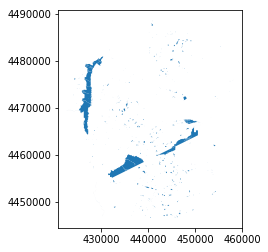

In [14]:
 # Can we visualize this dataset?  YES!  Import matplotlib and use .plot()
import matplotlib
lakesDF.plot()

### Working with columns:
Filter by column by using the column name in [] for one column

Create a list of column names for two or more

In [16]:
# Just one column:  (Choose ACRES)
print (lakesDF["ACRES"].head())

# Two or more columns  (Choose DESCRIPTIO and ACRES)
selfields = ["DESCRIPTIO", "ACRES"]
lakesfilter = lakesDF[selfields]

#Return the table showing just these 2 columns:


0     0.5
1     0.3
2     2.6
3    18.1
4     0.5
Name: ACRES, dtype: float64


In [17]:
# Get some descriptive statistics for a column with df.fieldname.describe()
lakesDF.ACRES.describe()

count     735.000000
mean       24.063537
std       172.175830
min         0.000000
25%         0.200000
50%         0.400000
75%         3.000000
max      2616.900000
Name: ACRES, dtype: float64

### Making a selection using simple SQL

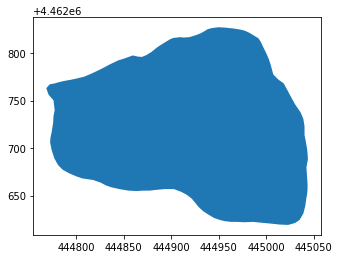

In [16]:
# Select a lake of your choice as a new dataframe by using NAME == ...lakename...
# Sample lake names: BEAR LAKE, MIRROR LAKE, GEM LAKE, or just look at the table above that you printed out

BearLake = lakesDF[lakesDF.NAME == "BEAR LAKE"]
BearLake.plot()

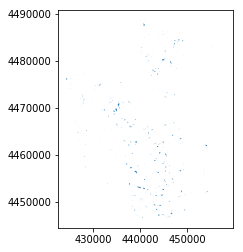

In [15]:
# Go back and change the lake you query for, watch the plot change
# A good one is the DESCRIPTIO field - find values that are "real" lakes and ponds

RealLakes = lakesDF[lakesDF.DESCRIPTIO == "LAKE OR POND"]
RealLakes.plot()


# Fun fact: Why is the field named DESCRIPTIO ?

In [29]:
print (type(RealLakes))

<class 'geopandas.geodataframe.GeoDataFrame'>


### Retrieving unique values:

In [26]:
# Retrieving unique values from a field: use df.fieldname.unique()
type_unique = lakesDF.DESCRIPTIO.unique()

# How many different unique values are there in the field?
print ("There are ",len(type_unique),"unique values in the Descriptio field")



# TRY THIS!
# Retrieve  and print uniques lake names (Use NAME field):


There are  6 unique values in the Descriptio field


In [24]:
for x in type_unique:
    print(x)

LAKE OR POND
GLACIER OR PERMANENT SNOWFIELD
MARSH, WETLAND, SWAMP, OR BOG
None
STREAM
RESERVOIR


# Saving your results

Use df.to_file(...path....shp)  or  df.to_file(...json)

In [ ]:
# Save the results of the selection above to its own shapefile. 
# Check your file explorer or use os.path.exists() to check that it worked!
RealLakes.to_file(path....)


# Simple Spatial Operations
Let's buffer our selected lake:
Certain operations return a geoDataFrame, others return a geoSeries.  This matters.

We'll start with .buffer  which returns a geoSeries.

In [22]:
print (type(BearLake))

<class 'geopandas.geodataframe.GeoDataFrame'>


<class 'geopandas.geoseries.GeoSeries'>


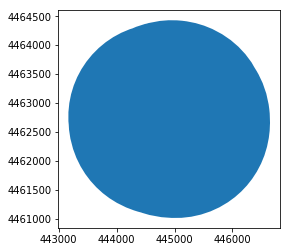

In [25]:
# Use .buffer() and supply the buffer distance in native map units. Return as a geoSeries
bearlkbuf = BearLake.buffer(1604)
bearlkbuf.plot()

print (type(bearlkbuf))



In [26]:
# Return the coordinates of this new lake buffer with .geometry
BearLake.geometry

464    POLYGON ((444982.6521785914 4462821.167006331,...
Name: geometry, dtype: object

In [45]:
# Return the centroid of Bear Lake:
print (BearLake.centroid)

long = BearLake.centroid.x
lat = BearLake.centroid.y
print (long)
print (lat)


464    POINT (444919.5548817404 4462721.19739287)
dtype: object
464    444919.554882
dtype: float64
464    4.462721e+06
dtype: float64


Here's a little more on working with coordinates:

https://gis.stackexchange.com/questions/166820/geopandas-return-lat-and-long-of-a-centroid-point

https://geopandas.org/data_structures.html


## LAB 5b, PART 1 -    Use your skills to:
Lab 5b = 25 points total. Part 1 (immediately below) = 10 points  ;  Part 2 ( way below) = 15 points

1. Create a second dataframe for the trails to perform some overlays and return/display the table

2. Test out and plot a few additional tasks: df.centroid, df.envelope, df.convex_hull and understand what they're showing

3. Get the unique values for the Trails layer UNIT field and print them out

Just fill in some code, test things out, comment out any code that you tried but doesn't run

In [52]:
# 1. Create a second dataframe for the trails (call it trailDF), display the table


In [71]:
# 2. Test out and plot df.centroid, df.envelope, df.convex_hull and more  .... and plot the results


In [ ]:
# 3. Return the unique values for the Trails layer UNIT field, print them out nicely


## Back together as a class...

Let's figure out: which trails are within 1000 meters of a lake?  ....Or which lakes are within 1000 meters of a trail?

Check that the coordinate reference systems match. There's no project on the fly in geopandas.

In [57]:
# Check the crs
print ("Trail crs = ", trailDF.crs)
print ("Lake crs = ", lakesDF.crs)

if trailDF.crs != lakesDF.crs:
    print ("CRS's do no match, resetting")
    trailDF.crs = lakesDF.crs
else:
    print ("CRS's match. Continuing...")


Trail crs =  {'init': 'epsg:32613'}
Lake crs =  {'init': 'epsg:32613'}
CRS's match. Continuing...


In the previous section, we buffered a geodataframe with .buffer.

It returned a geoseries.  Geoseries objects cannot be used in some types of operations.

Let's do a buffer an maintain the output as a geodataframe:


In [58]:
#Buffer but maintain as geodataframe

trailBufDF = gpd.GeoDataFrame(trailDF)
trailBufDF['geometry'] = trailDF.geometry.buffer(500)
type(trailBufDF)


geopandas.geodataframe.GeoDataFrame

<class 'geopandas.geodataframe.GeoDataFrame'>


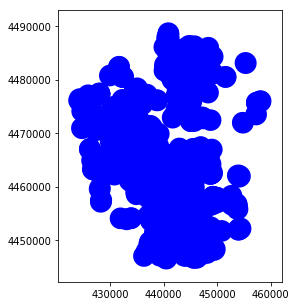

In [62]:
# Buffer the lakes by 1000 meters, call it lakesBuf
# Plot the lake in blue with color = "Blue" and make it bigger with figsize = (num,num)
RealLakeBufDF = gpd.GeoDataFrame(RealLakes)
RealLakeBufDF['geometry'] = RealLakeBufDF.geometry.buffer(500)
print(type(RealLakeBufDF))
RealLakeBufDF.plot(facecolor="blue", figsize=(10,5))

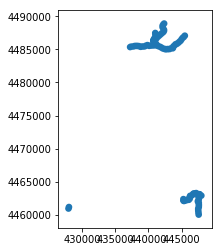

In [67]:
# Which trails are within 1000 meters of a lake?

trailDF[trailDF.geometry.intersects(RealLakeBufDF)].plot()

In [ ]:
# Which lakes are within 1000 meters of a trail?

laketrl = lakesDF[lakesDF.geometry.intersects(trailBuf)]
laketrl.plot(figsize=(30,15))

Overlay the trails and lakes buffers: intersection, union, difference, symmetrical difference:

Two ways to overlay, Refer to online resources and docs: 
https://geopandas.org/set_operations.html


1. df.intersects, df.union, df.difference
2. gpd.overlay(layer1, layer2, how) How = intersection, union, etc...
    This only works on geodataframes, though.

Combine polys into 1 with unary union - makes multi polygons or multi lines
    Try df.unary_union.envelope or .convex_hull to get the full extent or complete convex hull of the layer

<class 'geopandas.geodataframe.GeoDataFrame'>


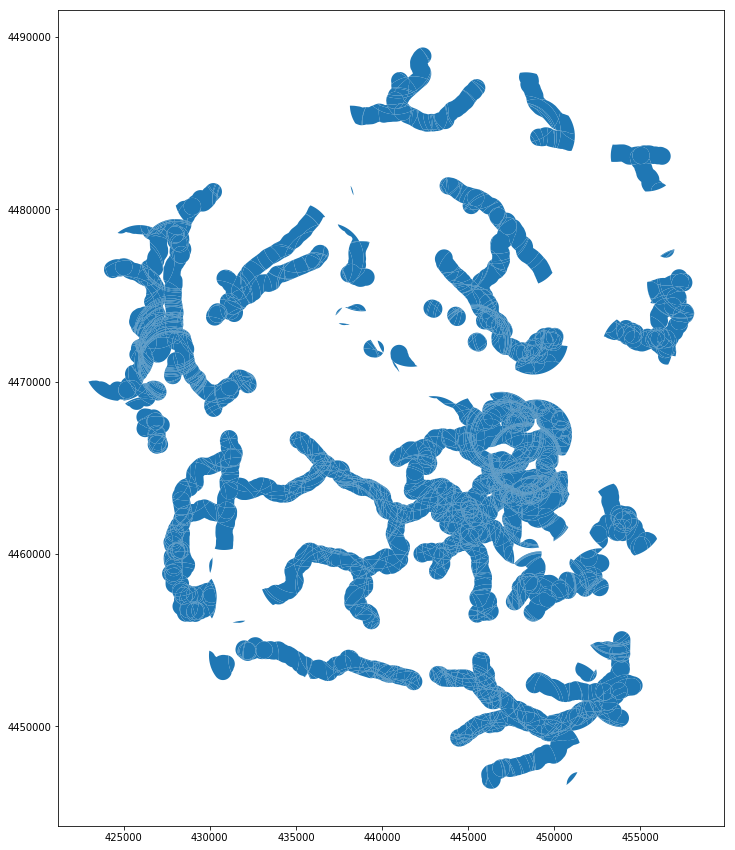

In [70]:
# 1. Overlay the layers with df.union etc...


# Getting help in a notebook:  Use a ? at the end
gpd.overlay?

#Example with .overlay:
trailsnearlakes = gpd.overlay(trailBufDF, RealLakeBufDF, 'intersection')
### The above step will take a few minutes


# Combine polys into 1 with unary union - makes multi polygons or multi lines
# This is like a dissolve, and is a good step to take before an overlay to simplify the overlay.
lakes_1 = lakesDF.unary_union


#Return the table and plot the visual:
print(type(trailsnearlakes))

trailsnearlakes.plot(figsize=(20,10))

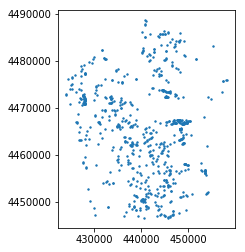

In [68]:
# Plot the centroids of the lakes  (Plot the lakes as points)
lakesDF.centroid.plot(markersize=2)

# On your own... Lab 5b tasks

Submit these tasks as the rest of Lab 5b.  25 points total (Part 1, above = 10 points, Part 2 = 15 points)

Label/annotate the code with comments or markdown.  Plot any outputs generated.

1. Get the trails that belong to the FRONT RANGE unit (Use the UNIT field)

2. Buffer those trails by 300m

3. If the CRS is the same for both trails and lakes, then: Overlay the lakes to the Front Range trail buffer

4. If the CRS is not the same, convert the CRS then perform the overlay



In [ ]:
# 1. Get just the trails in the Front Range Unit


# Plot the result with some properties applied: (column="", cmap="Greens", legend=True, figsize=(20,10))



In [ ]:
# 2. Buffer the selected Front Range trails by 300m



In [ ]:
# 3/4. Perform an overlay if the CRS values are the same. If they're not, fix it, then overlay.


# Plot the results with some properties like color, figsize


# Challenges
1. Plot using a nice color scheme (ie, experiment with color schemes and see if you can make a plot worth sharing)

2. Plot two layers in one plot

3. Compute the Difference (like an Erase) to remove areas within a certain distance from the trail buffer (Experiment with distances)

4. Determine which elk points (Use Elk843cow.shp) are within a certain buffer of lakes, or which lake buffers contain an elk point

5. Other questions or combinations you're curious about? Try them out!

# Putting two layers on one plot
Just FYI, here are a few examples of plotting, getting two layers on one plot and and zooming to an extent

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
fig, ax = plt.subplots()
lakes1000.plot(ax=ax, facecolor="blue")
elkNov2.to_crs(lakesDF.crs).plot(ax=ax,facecolor="red", markersize =10)
plt.tight_layout()

# some properties to experiment with: color, markersize, figsize, cx, facecolor, cmap, column

In [ ]:
# Which elk points are near lakes - intersect lakes buffer
# laketrl = lakesDF[lakesDF.geometry.intersects(trailbuf)]
elkutm = elk.to_crs(lakes1000.crs)
elk_lk = elkutm[elkutm.geometry.intersects(lakes1000)]
elk_lk.cx[445000:450000, 4466000:4469000].plot()

In [ ]:
#Plot intersected elk points on top of lakes1000

fig, ax = plt.subplots()
lakes1000.cx[445000:450000, 4466000:4469000].plot(ax=ax, facecolor="blue")
elk_lk.cx[445000:450000, 4466000:4469000].plot(ax=ax,facecolor="red", markersize =10)
plt.tight_layout()

In [ ]:
# Convert a geoseries into a geodataframe
lakes1000df = gpd.GeoDataFrame(gpd.GeoSeries(lakes1000))
trailbufdf =  gpd.GeoDataFrame(gpd.GeoSeries(trailbuf))

# You're just getting started!
## Keep working at it, thinking of questions, and figuring out how to answer them